# Week 7 - Vector Space Word Embeddings

In [1]:
#All these packages need to be installed from pip
import gensim#For word2vec, etc
import requests #For downloading our datasets
import lucem_illud_2020

import numpy as np #For arrays
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import sklearn.metrics.pairwise #For cosine similarity
import sklearn.manifold #For T-SNE
import sklearn.decomposition #For PCA

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project using at least two different specification of `word2vec`, and visualize them each with two separate visualization layout specifications (e.g., TSNE, PCA). Then interrogate critical word vectors within your corpus in terms of the most similar words, analogies, and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the semantic organization of words in your corpora? Which estimation and visualization specification generate the most insight and appear the most robustly supported and why? 

<span style="color:red">***Stretch***: Explore different vector calculations beyond addition and subtraction, such as multiplication, division or some other function. What does this exploration reveal about the semantic structure of your corpus?

For our final project, we intend to explore the commonalities and differences in text between comments and parent comments in the Reddit community. Our two datasets consist of 4 millions of comments that received the highest upvotes (2 million) and the highest downvotes (2 million). I'll primarily focus on the former, and my teammate will focus on the latter.

In [2]:
commentsDF = pandas.read_csv("comments_positive.csv", nrows=5000)

First, perform the analysis on **comment**.

In [3]:
commentsDF['tokenized_com'] = commentsDF['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
commentsDF['normalized_com'] = commentsDF['tokenized_com'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s, lemma=False) for s in x])

commentsDF.head()

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,parent_text,parent_score,parent_ups,parent_author,parent_controversiality,tokenized_com,normalized_com
0,c092j8m,t1_c092gss,t5_2qh2p,t3_8eyy3,This isn't Twitter: try to comment on the arti...,9582,9582,nraustinii,0,t3_8eyy3,Fucking faggot.,-7526,-7526,Glorificus,0,"[[This, is, n't, Twitter, try, to, comment, on...","[[twitter, try, comment, article, current, act..."
1,c4imcva,t1_c4im948,t5_2qh1i,t3_t0ynr,"Well, it is exactly what it sounds like. It's ...",9531,9531,Lynfect,0,t3_t0ynr,"Elaborate on this cum box, please.",3841,3841,eeeeevil,0,"[[Well, it, is, exactly, what, it, sounds, lik...","[[exactly, sounds, like], [shoebox, masturbate..."
2,c0s4nfi,t1_c0s4lje,t5_2qh1i,t3_cf1n2,"In soviet Russia, bomb disarms you!",8545,8545,CapnScumbone,0,t3_cf1n2,"I don't live in Russia anymore, and I will not...",621,621,shady8x,0,"[[In, soviet, Russia, bomb, disarms, you]]","[[soviet, russia, bomb, disarms]]"
3,c4ini33,t1_c4incln,t5_2qh1i,t3_t0ynr,"""runin for senitur! #YOLO!""",7430,7430,[deleted],0,t3_t0ynr,This just made me realize that future presiden...,4651,4651,drspg99,0,"[[runin, for, senitur], [YOLO]]","[[runin, senitur], [yolo]]"
4,c4imgel,t1_c4ima2e,t5_2qh1i,t3_t0ynr,You step motherfucker.,7173,7173,jbg89,0,t3_t0ynr,I have sex with my step mom when my dad isn't ...,4251,4251,audir8,0,"[[You, step, motherfucker]]","[[step, motherfucker]]"


In [4]:
commentsW2V = gensim.models.word2vec.Word2Vec(commentsDF['normalized_com'].sum())

In [5]:
commentsW2V.most_similar('love')

[('time', 0.9999166131019592),
 ('little', 0.9999034404754639),
 ('know', 0.9999026656150818),
 ('old', 0.9999014139175415),
 ('day', 0.9998979568481445),
 ('people', 0.9998970627784729),
 ('man', 0.9998959302902222),
 ('got', 0.9998939037322998),
 ('person', 0.9998880624771118),
 ('way', 0.9998879432678223)]

In [16]:
commentsW2V.similar_by_word('life',topn=10)

[('time', 0.9999362826347351),
 ('want', 0.9999339580535889),
 ('got', 0.9999295473098755),
 ('people', 0.9999284744262695),
 ('way', 0.9999223947525024),
 ('away', 0.9999208450317383),
 ('guy', 0.999920666217804),
 ('man', 0.9999203681945801),
 ('thing', 0.9999191761016846),
 ('like', 0.9999178647994995)]

`love` and `life` generate pretty similar words, however, the two words are not in each other's most similar words. This suggests that the top 10 words we generated are probably words that occur most frequently in the dataset rather than words that have closer meanings.

In [17]:
commentsW2V.most_similar(positive=['love', 'friend'], negative = ['hate'])

[('ve', 0.999137818813324),
 ('time', 0.99913489818573),
 ('day', 0.9991148114204407),
 ('got', 0.9991127252578735),
 ('story', 0.9991090893745422),
 ('thing', 0.9991080164909363),
 ('came', 0.99910569190979),
 ('seen', 0.9991040229797363),
 ('wife', 0.9991011619567871),
 ('getting', 0.9990929365158081)]

`love` is to `hate` as `friend` is to `wife`?

In [35]:
commentsW2V.most_similar(positive=['america', 'war'], negative = ['china'])

[('pants', 0.9923357963562012),
 ('building', 0.9922414422035217),
 ('alive', 0.992131769657135),
 ('ice', 0.9920884370803833),
 ('wiki', 0.9920850396156311),
 ('likes', 0.9920695424079895),
 ('surface', 0.9920209646224976),
 ('walking', 0.99197918176651),
 ('similar', 0.9919568300247192),
 ('quit', 0.9919512867927551)]

In this case, the top words generated are independent of the second word I put in the positive word list, meaning that the words are pretty similar each time. The reason could be that for words that have an association with the words we listed, many words have high cosine similarity (>0.99) because they occur frequently in the dataset, so that the algorithm cannot successfully calculate the relationship.

In [8]:
numWords = 50
targetWords = commentsW2V.wv.index2word[:numWords]

In [9]:
wordsSubMatrix = []
for word in targetWords:
    wordsSubMatrix.append(commentsW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)

In [10]:
pcaWords = sklearn.decomposition.PCA(n_components = 50).fit(wordsSubMatrix)
reducedPCA_data = pcaWords.transform(wordsSubMatrix)
#T-SNE
tsneWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data)

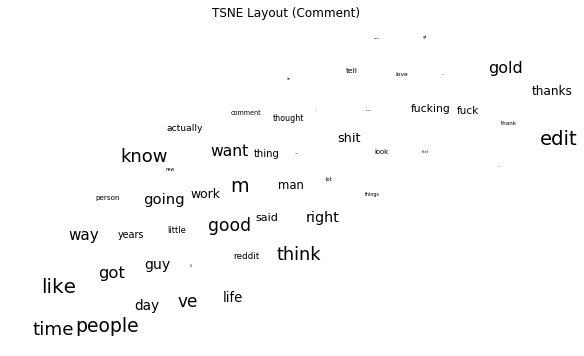

In [11]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWords[:, 0], tsneWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (tsneWords[:, 0][i],tsneWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.title('TSNE Layout (Comment)')
plt.show()

**Isomap** seeks a lower-dimensional embedding which maintains geodesic distances between all points.

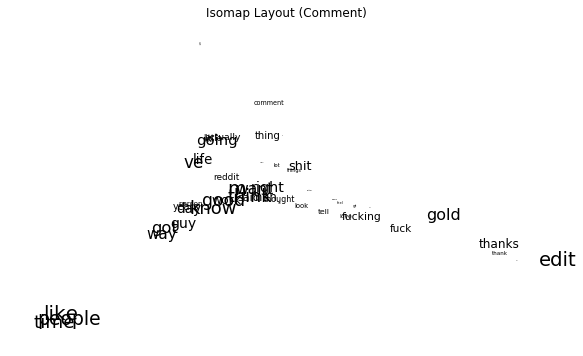

In [12]:
isoWords = sklearn.manifold.Isomap(n_components = 2).fit_transform(reducedPCA_data)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(isoWords[:, 0], isoWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(targetWords):
    ax.annotate(word, (isoWords[:, 0][i],isoWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.title('Isomap Layout (Comment)')
plt.show()

While Isomap is best suited to unfold a single continuous low dimensional manifold, t-SNE focuses on the local structure of the data and will tend to extract clustered local groups of samples. This ability to group samples based on the local structure is beneficial to visually disentangle our dataset that might comprise several manifolds at once. As shown in the graphs above, t-SNE provides more intuitive visualizations of the clusters in our dataset. The top words generated by PCA are words that occur frequently in colloquial expressions, which clearly reflects the characteristics of online comments.

Perform the same analysis on **parent comment** and visualize the layout using TSNE and Isomap.

In [36]:
commentsDF['tokenized_par'] = commentsDF['parent_text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
commentsDF['normalized_par'] = commentsDF['tokenized_par'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s, lemma=False) for s in x])

In [37]:
parentW2V = gensim.models.word2vec.Word2Vec(commentsDF['normalized_par'].sum())

In [38]:
numWords = 50
parWords = parentW2V.wv.index2word[:numWords]

In [39]:
parSubMatrix = []
for word in parWords:
    parSubMatrix.append(parentW2V[word])
parSubMatrix = np.array(parSubMatrix)

In [40]:
pcaparWords = sklearn.decomposition.PCA(n_components = 50).fit(parSubMatrix)
reducedPCA_par = pcaparWords.transform(parSubMatrix)
#T-SNE
tsneparWords = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_par)

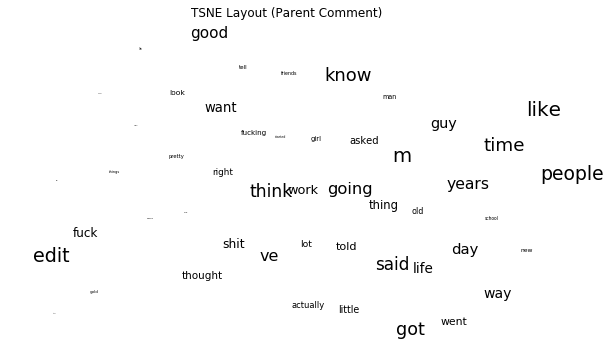

In [41]:
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneparWords[:, 0], tsneparWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(parWords):
    ax.annotate(word, (tsneparWords[:, 0][i],tsneparWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.title('TSNE Layout (Parent Comment)')
plt.show()

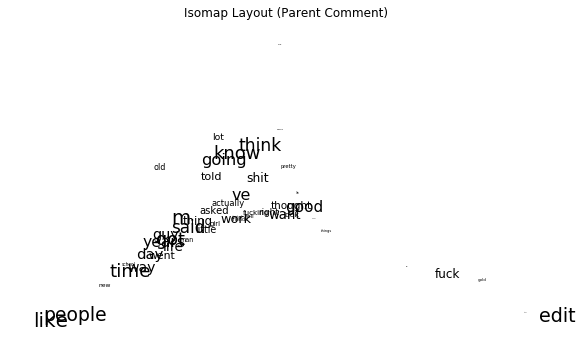

In [42]:
isoparWords = sklearn.manifold.Isomap(n_components = 2).fit_transform(reducedPCA_par)
fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(isoparWords[:, 0], isoparWords[:, 1], alpha = 0)#Making the points invisible 
for i, word in enumerate(parWords):
    ax.annotate(word, (isoparWords[:, 0][i],isoparWords[:, 1][i]), size =  20 * (numWords - i) / numWords)
plt.xticks(())
plt.yticks(())
plt.title('Isomap Layout (Parent Comment)')
plt.show()

Similar to the graphs for comments, t-SNE produced more intuitive visualizations of clusters in the parent comments. The t-SNE layout is more spread over the dimensions because our dataset primarily focuses on comments that received the highest upvotes - parent comments did not necessarily receive high scores and so may not share similar characteristics. However, the top words generated by PCA are quite similar to those in comments, suggesting that the words followed a similar pattern.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project using `doc2vec`, and explore the relationship between different documents and the word vectors you analyzed in the last exercise. Consider the most similar words to critical documents, analogies (doc _x_ + word _y_), and other additions and subtractions that reveal the structure of similarity and difference within your semantic space. What does this pattern reveal about the documentary organization of your semantic space?

We created 8 documents based on our datasets: top 100 comments that received the highest upvotes, along with their parent comments; last 100 comments that received the highest upvotes, along with their parent comments; top 100 comments that received the highest downvotes, along with their parent comments; last 100 comments that received the downest upvotes, along with their parent comments.

In [105]:
def process_text(df):
    df['tokenized_com'] = df['text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
    df['normalized_com'] = df['tokenized_com'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s, lemma=False) for s in x])
    df['tokenized_par'] = df['parent_text'].apply(lambda x: [lucem_illud_2020.word_tokenize(s) for s in lucem_illud_2020.sent_tokenize(x)])
    df['normalized_par'] = df['tokenized_par'].apply(lambda x: [lucem_illud_2020.normalizeTokens(s, lemma=False) for s in x])   
    
    return df


def create_text(csv_file):
    df = pandas.read_csv(csv_file)
    df_head = pandas.read_csv(csv_file, nrows=100)
    df_head = process_text(df_head)
    
    rowsdiff = df.shape[0] - 100
    df_tail = pandas.read_csv(csv_file, skiprows = range(1,rowsdiff), nrows = 100)
    df_tail = process_text(df_tail)
    
    return df_head, df_tail
    

In [106]:
pos_head, pos_tail = create_text("comments_positive.csv")
high_pos_com, high_pos_par = pos_head['normalized_com'], pos_head['normalized_par']
low_pos_com, low_pos_par = pos_tail['normalized_com'], pos_tail['normalized_par']

In [107]:
neg_head, neg_tail = create_text("comments_negative.csv")
high_neg_com, high_neg_par = neg_head['normalized_com'], neg_head['normalized_par']
low_neg_com, low_neg_par = neg_tail['normalized_com'], neg_tail['normalized_par']

In [133]:
def create_str(df):
    lst = []
    for i in range(len(df)): 
        for j in df.iloc[i]:
            for word in j:
                lst.append(word)
    return lst

In [134]:
# create a list of normalized comments
high_pos_comment = create_str(high_pos_com)
high_pos_parent = create_str(high_pos_par)
low_pos_comment = create_str(low_pos_com)
low_pos_parent = create_str(low_pos_par)

high_neg_comment = create_str(high_neg_com)
high_neg_parent = create_str(high_neg_par)
low_neg_comment = create_str(low_neg_com)
low_neg_parent = create_str(low_neg_par)

In [135]:
# create documents
cat = ["high positive comment", "high positive parent comment", "low positive comment", "low positive parent comment",
      "high negative comment", "high negative parent comment", "low negative comment", "low negative parent comment"]
text = [high_pos_comment, high_pos_parent, low_pos_comment, low_pos_parent, high_neg_comment, high_neg_parent,
       low_neg_comment, low_neg_parent]
compareDF = pandas.DataFrame({"category": cat, "text": text})
compareDF

,category,text
0,high positive comment,"[twitter, try, comment, article, current, acti..."
1,high positive parent comment,"[fucking, faggot, elaborate, cum, box, live, r..."
2,low positive comment,"[yeah, thought, snowpiercer, pretty, ridiculou..."
3,low positive parent comment,"[snowpiercer, worst, movies, ve, subjected, in..."
4,high negative comment,"[na, hate, islam, stands, want, share, streets..."
5,high negative parent comment,"[goes, heads, people, kill, murder, torture, v..."
6,low negative comment,"[=, ve, everybody, place, tried, kill, mention..."
7,low negative parent comment,"[know, house, sold, recently, ve, boat, proble..."


In [200]:
keywords = ['love', 'hate', 'kind', 'country', 'movie', 'news', 'kill']

In [201]:
taggedDocs = []
for index, row in compareDF.iterrows():
    #Just doing a simple keyword assignment
    docKeywords = [s for s in keywords if s in row['text']]
    docKeywords.append(row['category'])
    taggedDocs.append(gensim.models.doc2vec.LabeledSentence(words = row['text'], tags = docKeywords))
compareDF['TaggedComments'] = taggedDocs

In [202]:
compareD2V = gensim.models.doc2vec.Doc2Vec(compareDF['TaggedComments'], size = 100) #Limiting to 100 dimensions

/Users/reneehu/anaconda3/lib/python3.7/site-packages/gensim/models/doc2vec.py:574: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [203]:
compareD2V['love']

array([ 0.06345505,  0.03380151, -0.07041699, -0.07037113,  0.06168345,
       -0.00249128,  0.04790744,  0.01324176,  0.00185901, -0.01824275,
       -0.04845602,  0.05105621, -0.09725534, -0.07962437, -0.03385185,
       -0.01096483, -0.01575775, -0.06893611, -0.03763568,  0.05859266,
        0.07052027,  0.03561488, -0.02857186, -0.04931678,  0.00961458,
       -0.09402613, -0.02736014,  0.02418781, -0.00544616,  0.06507627,
       -0.04092212,  0.00482464,  0.00526921, -0.12450793, -0.01394363,
        0.08998483,  0.01105493,  0.09287046,  0.05958677,  0.01308354,
        0.02578614, -0.02685874, -0.0936076 ,  0.00262473, -0.02077241,
        0.09059042, -0.02751847, -0.04443972, -0.02070973,  0.06901935,
       -0.04462608, -0.03552155,  0.0174339 ,  0.0065117 ,  0.09850196,
       -0.03952331,  0.04559633,  0.10827013,  0.02812115, -0.04980139,
       -0.08111618,  0.01769219, -0.05708366, -0.05421334,  0.03777762,
        0.00398147, -0.04761179, -0.01348737, -0.08326329, -0.02

In [206]:
compareD2V.docvecs.most_similar([compareD2V['country'] ], topn=5)

[('high negative comment', 0.9955999255180359),
 ('movie', 0.9955859780311584),
 ('kind', 0.9955754280090332),
 ('hate', 0.9955718517303467),
 ('kill', 0.995571494102478)]

In [205]:
compareD2V.docvecs.most_similar([compareD2V['love'] ], topn=5)

[('low negative parent comment', 0.9985969066619873),
 ('news', 0.9985901713371277),
 ('kill', 0.9985718131065369),
 ('movie', 0.9985617995262146),
 ('hate', 0.9985536932945251)]

Interestingly, `country` is most similar to high negative comments, and `love` is most similar to low negative parent comment. Let's see words that are most similar to positive and negative comments.

In [207]:
compareD2V.most_similar([compareD2V.docvecs['high positive comment'] ], topn=5) 

[('george', 0.9974726438522339),
 ('m', 0.997394859790802),
 ('got', 0.9972699284553528),
 ('kill', 0.9971791505813599),
 ('day', 0.997143030166626)]

In [208]:
compareD2V.most_similar([compareD2V.docvecs['low positive comment'] ], topn=5) 

[('bed', 0.9993401765823364),
 ('like', 0.9992538690567017),
 ('time', 0.9992341995239258),
 ('ve', 0.9991830587387085),
 ('george', 0.9991773366928101)]

In [209]:
compareD2V.most_similar([compareD2V.docvecs['high negative comment'] ], topn=5) 

[('people', 0.999403178691864),
 ('like', 0.9993622899055481),
 ('time', 0.9993582963943481),
 ('bed', 0.9993208646774292),
 ('m', 0.9993140697479248)]

In [210]:
compareD2V.most_similar([compareD2V.docvecs['low negative comment'] ], topn=5) 

[('m', 0.9990662336349487),
 ('george', 0.9990646243095398),
 ('time', 0.9990450739860535),
 ('like', 0.9990077614784241),
 ('ve', 0.9989652633666992)]

`george` is everywhere! Interestingly, the top words for both positive and negative comments look pretty similar. Only looking at words that occurs most frequently in the dataset cannot let us know whether they received upvotes or downvotes. Let's see words most similar to the parent comments.

In [211]:
compareD2V.most_similar([compareD2V.docvecs['high positive parent comment'] ], topn=5) 

[('time', 0.9992340803146362),
 ('like', 0.9991881251335144),
 ('george', 0.9991636872291565),
 ('people', 0.9990927577018738),
 ('bed', 0.9990751147270203)]

In [212]:
compareD2V.most_similar([compareD2V.docvecs['high negative parent comment'] ], topn=5)

[('people', 0.9989222288131714),
 ('george', 0.998883843421936),
 ('long', 0.998773992061615),
 ('ve', 0.9987630248069763),
 ('time', 0.9987512826919556)]

The results still look pretty similar. These words occur frequently in all types of comments.

In [213]:
heatmapMatrix = []
for tagOuter in keywords:
    column = []
    tagVec = compareD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, compareD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrix.append(column)
heatmapMatrix = np.array(heatmapMatrix)

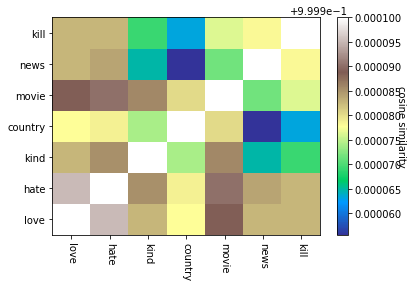

In [214]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrix, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrix.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrix.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(keywords, minor=False)

The words are very different from each other, according to the low cosine similarity. `movie`, `love`, and `hate` are relatively similar to each other than to other words.

In [215]:
targetDocs = compareDF['category'][:7]

heatmapMatrixD = []

for tagOuter in targetDocs:
    column = []
    tagVec = compareD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in targetDocs:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, compareD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixD.append(column)
heatmapMatrixD = np.array(heatmapMatrixD)

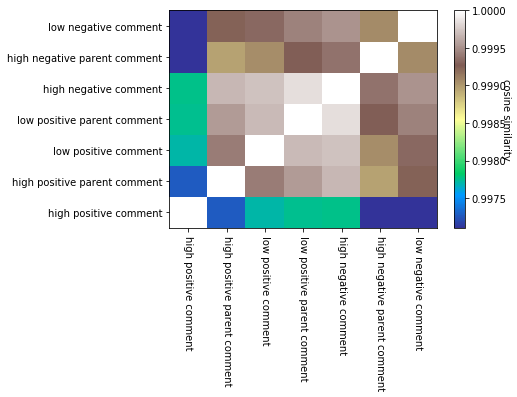

In [216]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixD, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixD.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixD.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(targetDocs, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

The high cosine similarity among all documents suggest that the comments are highly similar to each other regardless of their types and sentiment.

In [217]:
heatmapMatrixC = []

for tagOuter in targetDocs:
    column = []
    tagVec = compareD2V.docvecs[tagOuter].reshape(1, -1)
    for tagInner in keywords:
        column.append(sklearn.metrics.pairwise.cosine_similarity(tagVec, compareD2V.docvecs[tagInner].reshape(1, -1))[0][0])
    heatmapMatrixC.append(column)
heatmapMatrixC = np.array(heatmapMatrixC)

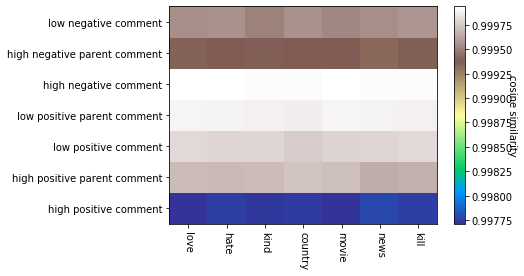

In [218]:
fig, ax = plt.subplots()
hmap = ax.pcolor(heatmapMatrixC, cmap='terrain')
cbar = plt.colorbar(hmap)

cbar.set_label('cosine similarity', rotation=270)
a = ax.set_xticks(np.arange(heatmapMatrixC.shape[1]) + 0.5, minor=False)
a = ax.set_yticks(np.arange(heatmapMatrixC.shape[0]) + 0.5, minor=False)

a = ax.set_xticklabels(keywords, minor=False, rotation=270)
a = ax.set_yticklabels(targetDocs, minor=False)

Again, all keywords are similar to the documents because they frequently appeared in the comments.

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">Construct cells immediately below this that embed documents related to your final project, then generate meaningful semantic dimensions based on your theoretical understanding of the semantic space (i.e., by subtracting semantically opposite word vectors) and project another set of word vectors onto those dimensions. Interpret the meaning of these projections for your analysis. Which of the dimensions you analyze explain the most variation in the projection of your words and why? 

<span style="color:red">***Stretch***: Average together multiple antonym pairs to create robust semantic dimensions. How do word projections on these robust dimensions differ from single-pair dimensions?

In [172]:
#words to create dimensions
TargetWords = ['man', 'woman', 'black', 'white', 'rich', 'expensive', 'poor', 'cheap']
#words we will be mapping
TargetWords += ['country', 'america', 'government', 'policy', 'war', 'peace']

wordsSubMatrix = []
for word in TargetWords:
    wordsSubMatrix.append(commentsW2V[word])
wordsSubMatrix = np.array(wordsSubMatrix)
wordsSubMatrix

array([[-0.19478531, -0.38704777, -0.5084937 , ...,  0.33377197,
         0.18364523,  0.6757389 ],
       [-0.1316349 , -0.25548887, -0.3405636 , ...,  0.22176443,
         0.12266283,  0.44725817],
       [-0.17136243, -0.32709166, -0.4385494 , ...,  0.2831357 ,
         0.15538658,  0.58065164],
       ...,
       [-0.03085908, -0.06499675, -0.09155098, ...,  0.06243924,
         0.03322316,  0.12084026],
       [-0.07798249, -0.15658124, -0.2098592 , ...,  0.13113749,
         0.07713323,  0.27516827],
       [-0.02824104, -0.0520186 , -0.06444854, ...,  0.04085519,
         0.02889569,  0.09148625]], dtype=float32)

In [174]:
pcaWordsCom = sklearn.decomposition.PCA(n_components = 10).fit(wordsSubMatrix)
reducedPCA_dataCom = pcaWordsCom.transform(wordsSubMatrix)
#T-SNE
tsneWordsCom = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_dataCom)

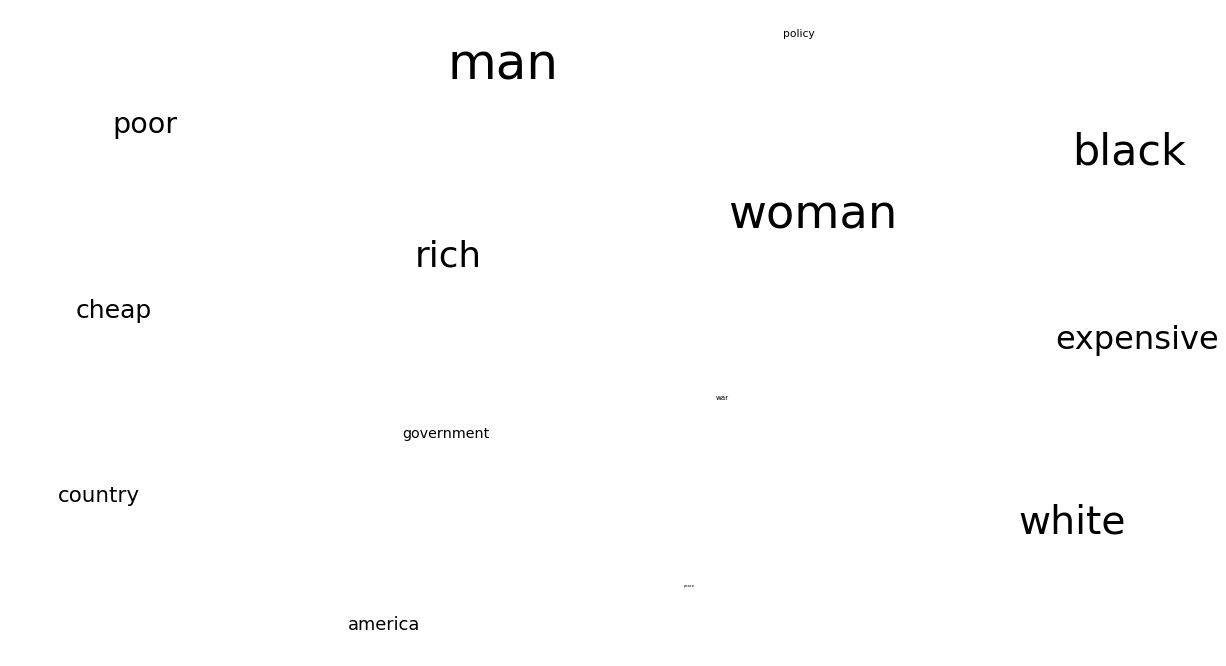

In [175]:
fig = plt.figure(figsize = (20,12))
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(tsneWordsCom[:, 0], tsneWordsCom[:, 1], alpha = 0) #Making the points invisible
for i, word in enumerate(TargetWords):
    ax.annotate(word, (tsneWordsCom[:, 0][i],tsneWordsCom[:, 1][i]), size =  50 * (len(TargetWords) - i) / len(TargetWords))
plt.xticks(())
plt.yticks(())
plt.show()

The projection of word vectors to an arbitrary semantic dimension does not work well on our dataset, possibly due to small number of features.

In [176]:
def normalize(vector):
    normalized_vector = vector / np.linalg.norm(vector)
    return normalized_vector

def dimension(model, positives, negatives):
    diff = sum([normalize(model[x]) for x in positives]) - sum([normalize(model[y]) for y in negatives])
    return diff

In [177]:
Gender = dimension(commentsW2V, ['man'], ['woman'])
Race = dimension(commentsW2V, ['black'], ['white'])
Class = dimension(commentsW2V, ['rich', 'expensive'], ['poor', 'cheap'])

In [184]:
Government = ['country', 'america', 'government', 'policy', 'war', 'peace']
Emotions = ['love', 'like', 'want', 'kind', 'hate', 'dislike', 'emotional']

In [185]:
def makeDF(model, word_list):
    g = []
    r = []
    c = []
    for word in word_list:
        g.append(sklearn.metrics.pairwise.cosine_similarity(commentsW2V[word].reshape(1,-1), Gender.reshape(1,-1))[0][0])
        r.append(sklearn.metrics.pairwise.cosine_similarity(commentsW2V[word].reshape(1,-1), Race.reshape(1,-1))[0][0])
        c.append(sklearn.metrics.pairwise.cosine_similarity(commentsW2V[word].reshape(1,-1), Class.reshape(1,-1))[0][0])
    df = pandas.DataFrame({'gender': g, 'race': r, 'class': c}, index = word_list)
    return df

In [186]:
Govdf = makeDF(commentsW2V, Government) 
Emodf = makeDF(commentsW2V, Emotions)

In [187]:
def Coloring(Series):
    x = Series.values
    y = x-x.min()
    z = y/y.max()
    c = list(plt.cm.rainbow(z))
    return c

def PlotDimension(ax,df, dim):
    ax.set_frame_on(False)
    ax.set_title(dim, fontsize = 20)
    colors = Coloring(df[dim])
    for i, word in enumerate(df.index):
        ax.annotate(word, (0, df[dim][i]), color = colors[i], alpha = 0.6, fontsize = 12)
    MaxY = df[dim].max()
    MinY = df[dim].min()
    plt.ylim(MinY,MaxY)
    plt.yticks(())
    plt.xticks(())

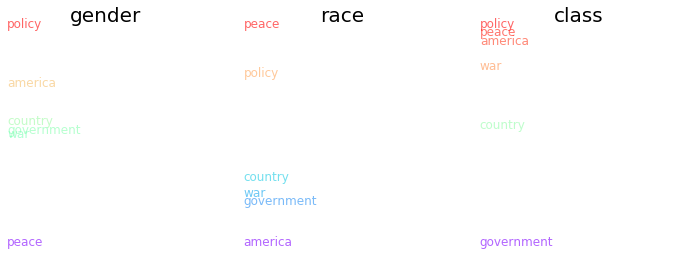

In [188]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Govdf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Govdf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Govdf, 'class')
plt.show()

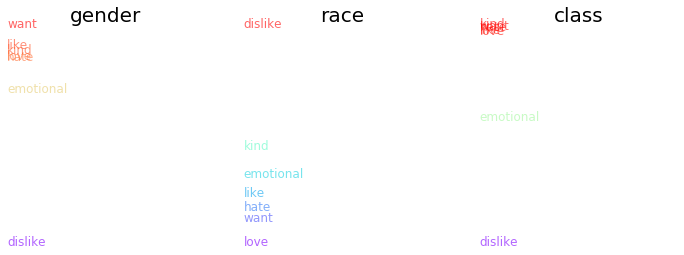

In [189]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(131)
PlotDimension(ax1, Emodf, 'gender')
ax2 = fig.add_subplot(132)
PlotDimension(ax2, Emodf, 'race')
ax3 = fig.add_subplot(133)
PlotDimension(ax3, Emodf, 'class')
plt.show()

In words related to government, `policy` and `peace` stayed high in all dimensions, suggesting high cosine similarity. Gender is prevalent in `america`, and `war` is highly related to Class. These all makes sense in the context. In words related to emotions, interestingly, `dislike` is most similar to Race. Since we used the model we trained in Exercise 1, these are comments that received the highest upvotes, which makes it even more interestingly. `kind`, `like`, `love`, and `want` are all high in dimensions Gender and Class, suggesting quite positive sentiment in the two classes. As we can see in the projection of word vectors above, policy is high with all three dimensions: Gender, Race, and Class. The other words are closer to their own related dimension. Race explains the most variation in the projection of words.

## <span style="color:red">*Exercise 4a*</span>

<span style="color:red">**Do only 4a or 4b.** Construct cells immediately below this that calculate the scores for a small sample of documents from outside your corpus to identify which are *closest* to your corpus. Then calculate the scores for a few phrases or sentences to identify the ones most likely to have appeared in your corpus. Interrogate patterns associated with these document/phrase scores (e.g., which companies produced job ads most or least likely to find jobseekers in the resume corpus?) What do these patterns suggest about the boundaries of your corpus?

We uses the word2vec model constructed for comment and calculated the scores on parent comment.

In [219]:
com_vocab = commentsW2V.wv.index2word

In [220]:
def adprob(ad, model):
    com_scores = model.score(ad, len(ad))
    ad_score = com_scores.mean()
    return ad_score

In [221]:
tempW2V = gensim.models.word2vec.Word2Vec(commentsDF['normalized_com'].sum(), hs=1, negative=0)

In [222]:
commentsDF['par_likelihood'] = commentsDF['normalized_par'].apply(lambda x: adprob(x, tempW2V))
commentsDF.head()

,id,parent_id,subreddit_id,link_id,text,score,ups,author,controversiality,parent_link_id,...,parent_score,parent_ups,parent_author,parent_controversiality,tokenized_com,normalized_com,tokenized_par,normalized_par,com_likelihood,par_likelihood
0,c092j8m,t1_c092gss,t5_2qh2p,t3_8eyy3,This isn't Twitter: try to comment on the arti...,9582,9582,nraustinii,0,t3_8eyy3,...,-7526,-7526,Glorificus,0,"[[This, is, n't, Twitter, try, to, comment, on...","[[twitter, try, comment, article, current, act...","[[Fucking, faggot]]","[[fucking, faggot]]",-37.875248,-5.641754
1,c4imcva,t1_c4im948,t5_2qh1i,t3_t0ynr,"Well, it is exactly what it sounds like. It's ...",9531,9531,Lynfect,0,t3_t0ynr,...,3841,3841,eeeeevil,0,"[[Well, it, is, exactly, what, it, sounds, lik...","[[exactly, sounds, like], [shoebox, masturbate...","[[Elaborate, on, this, cum, box, please]]","[[elaborate, cum, box]]",-22.978479,-14.445838
2,c0s4nfi,t1_c0s4lje,t5_2qh1i,t3_cf1n2,"In soviet Russia, bomb disarms you!",8545,8545,CapnScumbone,0,t3_cf1n2,...,621,621,shady8x,0,"[[In, soviet, Russia, bomb, disarms, you]]","[[soviet, russia, bomb, disarms]]","[[I, do, n't, live, in, Russia, anymore, and, ...","[[live, russia, anymore, going, time, soon], [...",-9.167850,-31.071903
3,c4ini33,t1_c4incln,t5_2qh1i,t3_t0ynr,"""runin for senitur! #YOLO!""",7430,7430,[deleted],0,t3_t0ynr,...,4651,4651,drspg99,0,"[[runin, for, senitur], [YOLO]]","[[runin, senitur], [yolo]]","[[This, just, made, me, realize, that, future,...","[[realize, future, presidents, probably, faceb...",0.000000,-45.148430
4,c4imgel,t1_c4ima2e,t5_2qh1i,t3_t0ynr,You step motherfucker.,7173,7173,jbg89,0,t3_t0ynr,...,4251,4251,audir8,0,"[[You, step, motherfucker]]","[[step, motherfucker]]","[[I, have, sex, with, my, step, mom, when, my,...","[[sex, step, mom, dad], [m, junior, high, scho...",-16.644398,-34.615280


In [224]:
for ad in commentsDF.sort_values(by = 'par_likelihood', ascending = False)['parent_text'][:5]:
    print (ad + '\n\n')

That's with roaches.


Are you still up!?!?!?!


Aaaaaaaaaaaaaand f*ck you.


Seven 


"The bell does not dismiss you, I DO!" 






In [226]:
for ad in commentsDF.sort_values(by = 'par_likelihood', ascending = True)['parent_text'][:5]:
    print (ad + '\n\n')

I think people forget that 5-10 years ago, he gave a lot of interviews where he half-jokingly said that since he had kids, he a) only wanted to make lighter movies he could watch with them, and b) was going to start taking roles just for the money, because life is short and movies don't matter as much as spending time in comfort with your children. 

People took that as a joke, but in retrospect I think it's time to maybe consider that he was being completely open and honest in that moment, and now we're seeing the product of someone who gets $20 Million even for the worst films he does and really doesn't give a fuck about acting legacy. 


There is a rumor in the movie industry that in the opening sequence of "Apocalypse Now", the scene where you were drunk and punched the mirror, you were actually drunk and crying legitimately, and that you did not want that footage shown in the film, is this true?


"The money you save buying bad food will later be spent on hospital bills"

-Serbian

Since we used comment model to generate the likelihood of the parent text to appear in our dataset, we will focus on 
the top 5 parent text that are most likely to occur and the top 5 that are least likely to occur. There are some clear patterns in our finding. The text that are most likely to have appeared in our dataset are usually very short and express very strong emotions. Instead, the text that are least likely to appear in our dataset are usually long, which may not be a favorable characteristics in online community. Also, they mostly consist of statements/opinions and are narrative. These results indicate that the text that are most likely to receive upvotes are often short and emotional.